
# Fetching Dataset

_______________________________________________________________________________________________________________________________

In [1]:
import pandas
import numpy
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models  import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset = pandas.read_csv('corona_tested_individuals_ver_0083.english.csv/corona_tested_individuals_ver_0083.english.csv')


C:\Users\gg415\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pandas.set_option('display.max_columns', None)


In [5]:
dataset

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [6]:
dataset.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

# EDA

________________________________________________________________________________

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [8]:
dataset["corona_result"].value_counts()

negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

In [9]:
dataset = dataset[dataset.corona_result != 'other']

In [10]:
gender = pandas.get_dummies(dataset['gender'])
female = gender['female']

In [11]:
age_60_and_above = pandas.get_dummies(dataset['age_60_and_above'], prefix='age_60_and_above')

In [12]:
age_60_and_above_Yes = age_60_and_above['age_60_and_above_Yes']

In [13]:
X = dataset[['cough', 'fever', 'sore_throat', 'shortness_of_breath','head_ache']]

In [14]:
X = pandas.concat([X,age_60_and_above_Yes,female],axis =1)

In [15]:
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above_Yes,female
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2742590,0,0,0,0,0,0,0
2742591,0,0,0,0,0,0,1
2742592,0,0,0,0,0,0,1
2742594,0,0,0,0,0,0,1


In [16]:
corona_result = pandas.get_dummies(dataset['corona_result'], prefix='corona_result')

In [17]:
y = corona_result['corona_result_positive']

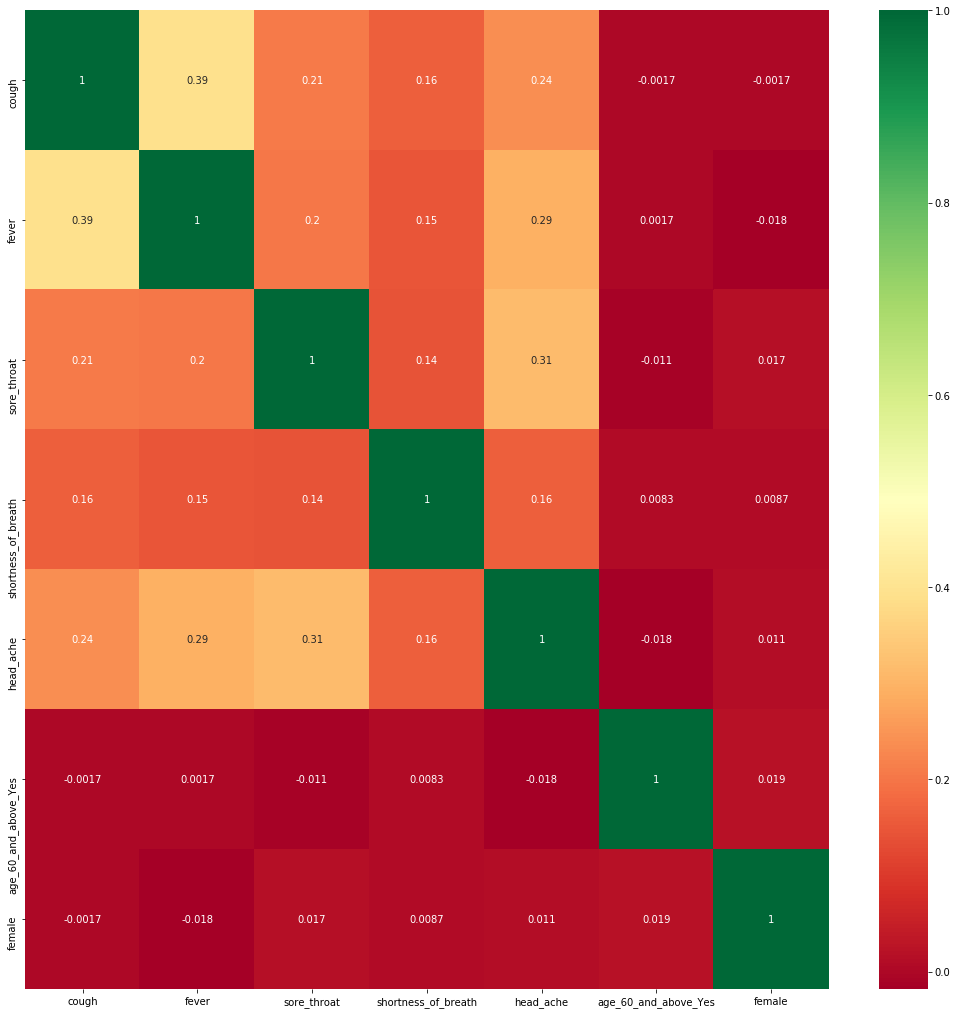

In [18]:
plt.figure(figsize = (18,18))
sns.heatmap(X.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# Feature Selection

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [20]:
print(selection.feature_importances_)


[0.05565895 0.270741   0.09968867 0.02549797 0.53404372 0.0123989
 0.0019708 ]


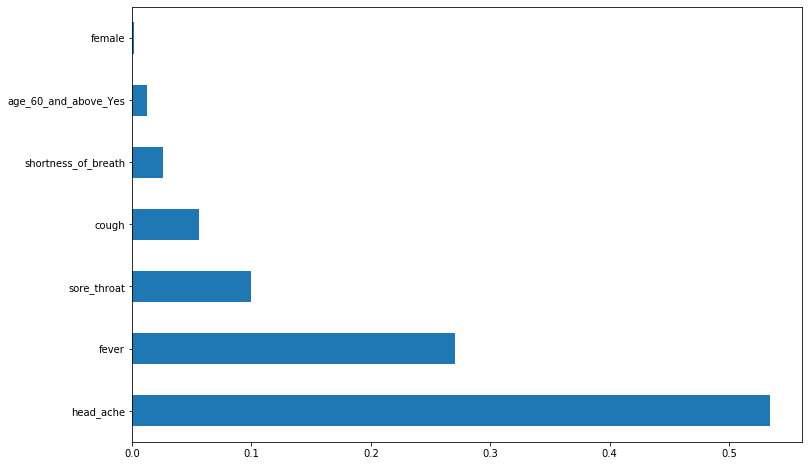

In [21]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pandas.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Training

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=92)

In [23]:
learning_rate_value = 0.00005
        
model2 = Sequential()
model2.add( Dense(units=50,  
                 kernel_initializer="zeros", 
                 bias_initializer="zeros",
                 input_dim=X_train.shape[1],
                 activation='relu'
                 
                )  )

In [24]:
model2.add(Dense(units=36,activation='relu'))
model2.add(Dense(units=12,activation='relu'))
model2.add(Dense(units=12,activation='relu'))
model2.add(Dense(units=12,activation='relu'))
model2.add(Dense( units=1, 
                 activation='sigmoid',
                 kernel_initializer="zeros", 
                 bias_initializer="zeros"
                ))

In [25]:
model2.compile(optimizer=Adam(learning_rate=learning_rate_value),loss="binary_crossentropy",metrics =['accuracy'])


In [26]:
#model2.fit(X_train,y_train,
#           epochs=20, verbose=1,
#           validation_data=(X_test,y_test),
#          validation_steps=100,
#          shuffle=True)

Epoch 1/20
50651/50651 [==============================] - 158s 3ms/step - loss: 0.5154 - accuracy: 0.9180 - val_loss: 0.2864 - val_accuracy: 0.9183
Epoch 2/20
50651/50651 [==============================] - 144s 3ms/step - loss: 0.2843 - accuracy: 0.9182 - val_loss: 0.2830 - val_accuracy: 0.9183
Epoch 3/20
50651/50651 [==============================] - 137s 3ms/step - loss: 0.2823 - accuracy: 0.9185 - val_loss: 0.2830 - val_accuracy: 0.9183
Epoch 4/20
50651/50651 [==============================] - 144s 3ms/step - loss: 0.2841 - accuracy: 0.9178 - val_loss: 0.2830 - val_accuracy: 0.9183
Epoch 5/20
50651/50651 [==============================] - 145s 3ms/step - loss: 0.2834 - accuracy: 0.9181 - val_loss: 0.2830 - val_accuracy: 0.9183
Epoch 6/20
50651/50651 [==============================] - 146s 3ms/step - loss: 0.2843 - accuracy: 0.9177 - val_loss: 0.2830 - val_accuracy: 0.9183
Epoch 7/20
50651/50651 [==============================] - 140s 3ms/step - loss: 0.2823 - accuracy: 0.9185 - val_

In [27]:
scores = model2.evaluate(X_test, y_test, verbose=False)

In [28]:
scores

[0.28302785754203796, 0.9182528853416443]

# Saving Model


In [29]:
#import joblib
#joblib.dump(model2, "coweb.pk1")

In [39]:
#import pickle
# open a file, where you ant to store the data
#file = open('coweb.pk1', 'wb')

# dump information to that file
#pickle.dump(model2, file)

In [35]:
import tensorflow as tf
model2.save('coweb.h5')
#tf.keras.models.save_model(model2, file)

In [36]:
loaded_model = tf.keras.models.load_model('coweb.h5')

In [37]:
scores = loaded_model.evaluate(X_test, y_test, verbose=False)

In [38]:
scores

[0.28302785754203796, 0.9182528853416443]